<a href="https://colab.research.google.com/github/HL7988/NLP-/blob/main/NLP_Transformer__hotel_data_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install googletrans==3.1.0a0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline
classifier=pipeline('text-classification')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [ ]:
!pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from googletrans import Translator
df = pd.read_csv("Data Analyst - Test Data - US.csv",encoding='utf-8')


translator = Translator()

In [ ]:
df

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America


In [ ]:
df.drop(axis=1, columns=['Location'], inplace=True)

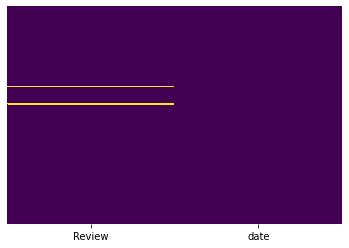

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df['Review'].replace('[^a-zA-Z]',' ', regex=True, inplace=True)

In [ ]:
df

,Review,date
0,I was very impressed with the resort Great s...,2019/08/20
1,The rooms were nice the outside needs work als...,2019/08/20
2,Great location I have stayed at this hotel on...,2019/08/20
3,The hotel was adequate for my stay The strips...,2019/08/20
4,Great location room was large and spacious P...,2019/08/19
...,...,...
6443,the staff were all so friendly frank the ch...,2019/07/12
6444,the internet barely worked or didn t work,2019/07/12
6445,the location was great the bed was...,2019/07/10
6446,we were early for check in and the staff was ...,2019/07/10


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Review,date
0,I was very impressed with the resort Great s...,2019/08/20
1,The rooms were nice the outside needs work als...,2019/08/20
2,Great location I have stayed at this hotel on...,2019/08/20
3,The hotel was adequate for my stay The strips...,2019/08/20
4,Great location room was large and spacious P...,2019/08/19
...,...,...
6443,the staff were all so friendly frank the ch...,2019/07/12
6444,the internet barely worked or didn t work,2019/07/12
6445,the location was great the bed was...,2019/07/10
6446,we were early for check in and the staff was ...,2019/07/10


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from langdetect import detect

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,Review,date
0,I was very impressed with the resort Great s...,2019/08/20
1,The rooms were nice the outside needs work als...,2019/08/20
2,Great location I have stayed at this hotel on...,2019/08/20
3,The hotel was adequate for my stay The strips...,2019/08/20
4,Great location room was large and spacious P...,2019/08/19
...,...,...
6388,the staff were all so friendly frank the ch...,2019/07/12
6389,the internet barely worked or didn t work,2019/07/12
6390,the location was great the bed was...,2019/07/10
6391,we were early for check in and the staff was ...,2019/07/10


In [ ]:
df['translated_value'] = df['Review'].apply(lambda x: translator.translate(x, dest='en').text)

In [ ]:
df.head()

,Review,date,translated_value
0,I was very impressed with the resort Great s...,2019/08/20,I was very impressed with the resort Great s...
1,The rooms were nice the outside needs work als...,2019/08/20,The rooms were nice the outside needs work als...
2,Great location I have stayed at this hotel on...,2019/08/20,Great location I have stayed at this hotel on...
3,The hotel was adequate for my stay The strips...,2019/08/20,The hotel was adequate for my stay The strips...
4,Great location room was large and spacious P...,2019/08/19,Great location room was large and spacious P...


In [ ]:
df.drop(columns=['Review'], inplace=True)

In [ ]:
df1=df['translated_value'].str.replace("Read more   Read less","", )

In [ ]:
df1=pd.DataFrame(df1)
df1

,translated_value
0,I was very impressed with the resort Great s...
1,The rooms were nice the outside needs work als...
2,Great location I have stayed at this hotel on...
3,The hotel was adequate for my stay The strips...
4,Great location room was large and spacious P...
...,...
6388,the staff were all so friendly frank the che...
6389,the internet barely worked or didn t work
6390,the location was great the bed was ...
6391,we were early for check in and the staff was v...


In [ ]:
df['review']=df1['translated_value']

In [ ]:
df

,date,translated_value,review
0,2019/08/20,I was very impressed with the resort Great s...,I was very impressed with the resort Great s...
1,2019/08/20,The rooms were nice the outside needs work als...,The rooms were nice the outside needs work als...
2,2019/08/20,Great location I have stayed at this hotel on...,Great location I have stayed at this hotel on...
3,2019/08/20,The hotel was adequate for my stay The strips...,The hotel was adequate for my stay The strips...
4,2019/08/19,Great location room was large and spacious P...,Great location room was large and spacious P...
...,...,...,...
6388,2019/07/12,the staff were all so friendly frank the che...,the staff were all so friendly frank the che...
6389,2019/07/12,the internet barely worked or didn t work,the internet barely worked or didn t work
6390,2019/07/10,the location was great the bed was ...,the location was great the bed was ...
6391,2019/07/10,we were early for check in and the staff was v...,we were early for check in and the staff was v...


In [ ]:
df.drop(columns=['translated_value'], inplace=True)

In [ ]:
df

,date,review
0,2019/08/20,I was very impressed with the resort Great s...
1,2019/08/20,The rooms were nice the outside needs work als...
2,2019/08/20,Great location I have stayed at this hotel on...
3,2019/08/20,The hotel was adequate for my stay The strips...
4,2019/08/19,Great location room was large and spacious P...
...,...,...
6388,2019/07/12,the staff were all so friendly frank the che...
6389,2019/07/12,the internet barely worked or didn t work
6390,2019/07/10,the location was great the bed was ...
6391,2019/07/10,we were early for check in and the staff was v...


In [ ]:
lst1=df['review'].tolist()

In [ ]:
lst1

['I was very impressed with the resort   Great staff at the main resort pool bar  We had a blast with them   Clean  professional staff  great location and very reasonable       ',
 'The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok      ',
 'Great location  I have stayed at this hotel on my last three trips to New York       ',
 'The hotel was adequate for my stay  The strips in the bathtub were useless as I fell while taking a shower  I asked the front desk staff several times to get a bath mat but they never did  Management was unresponsive to my request which was very poor  someone should have gone to a dollar store and gotten a bath mat  Breakfast was good but it would have been nice to have had yogurt and or cottage cheese on the buffet       ',
 'Great location  room was large and spacious  Parking was easy and we appreciated the friendly staff      ',
 'All the options for fun were great  Do wish there were a better polic

In [ ]:
result1= classifier(lst1)

In [ ]:
score_sample = [x['score'] for x in result1]
print(score_sample[:5])
result_sample = [x['label'] for x in result1]
print(result_sample[:5])

fx = {'POSITIVE':0, "NEGATIVE":0}

for i in result_sample:
  fx[i] +=1

print(fx)


df['Result'] = result_sample
df['Score'] = score_sample
df1.to_csv("./result.csv")

[0.9998071789741516, 0.989677906036377, 0.9997801184654236, 0.9996132254600525, 0.9997685551643372]
['POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE']
{'POSITIVE': 3413, 'NEGATIVE': 2980}


In [ ]:
df

,date,review,Result,Score
0,2019/08/20,I was very impressed with the resort Great s...,POSITIVE,0.999807
1,2019/08/20,The rooms were nice the outside needs work als...,NEGATIVE,0.989678
2,2019/08/20,Great location I have stayed at this hotel on...,POSITIVE,0.999780
3,2019/08/20,The hotel was adequate for my stay The strips...,NEGATIVE,0.999613
4,2019/08/19,Great location room was large and spacious P...,POSITIVE,0.999769
...,...,...,...,...
6388,2019/07/12,the staff were all so friendly frank the che...,POSITIVE,0.915428
6389,2019/07/12,the internet barely worked or didn t work,NEGATIVE,0.999793
6390,2019/07/10,the location was great the bed was ...,NEGATIVE,0.896010
6391,2019/07/10,we were early for check in and the staff was v...,POSITIVE,0.997090


In [ ]:
df.describe()

,Score
count,6393.000000
mean,0.973992
std,0.075429
min,0.500994
25%,0.991476
50%,0.998732
75%,0.999672
max,0.999891


In [ ]:
df['Result'].describe()

count         6393
unique           2
top       POSITIVE
freq          3413
Name: Result, dtype: object

In [ ]:
df.to_csv('final_result.csv')

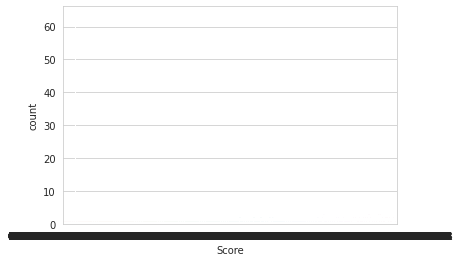

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Score',data=df)

In [ ]:
df_positive=df.loc[df['Result']=='POSITIVE']

In [ ]:
df

,date,review,Result,Score
0,2019/08/20,I was very impressed with the resort Great s...,POSITIVE,0.999807
1,2019/08/20,The rooms were nice the outside needs work als...,NEGATIVE,0.989678
2,2019/08/20,Great location I have stayed at this hotel on...,POSITIVE,0.999780
3,2019/08/20,The hotel was adequate for my stay The strips...,NEGATIVE,0.999613
4,2019/08/19,Great location room was large and spacious P...,POSITIVE,0.999769
...,...,...,...,...
6388,2019/07/12,the staff were all so friendly frank the che...,POSITIVE,0.915428
6389,2019/07/12,the internet barely worked or didn t work,NEGATIVE,0.999793
6390,2019/07/10,the location was great the bed was ...,NEGATIVE,0.896010
6391,2019/07/10,we were early for check in and the staff was v...,POSITIVE,0.997090


In [ ]:
df2=df
df2['date']= pd.to_datetime(df2['date'])

In [ ]:
df2

,date,review,Result,Score
0,2019-08-20,I was very impressed with the resort Great s...,POSITIVE,0.999807
1,2019-08-20,The rooms were nice the outside needs work als...,NEGATIVE,0.989678
2,2019-08-20,Great location I have stayed at this hotel on...,POSITIVE,0.999780
3,2019-08-20,The hotel was adequate for my stay The strips...,NEGATIVE,0.999613
4,2019-08-19,Great location room was large and spacious P...,POSITIVE,0.999769
...,...,...,...,...
6388,2019-07-12,the staff were all so friendly frank the che...,POSITIVE,0.915428
6389,2019-07-12,the internet barely worked or didn t work,NEGATIVE,0.999793
6390,2019-07-10,the location was great the bed was ...,NEGATIVE,0.896010
6391,2019-07-10,we were early for check in and the staff was v...,POSITIVE,0.997090


In [ ]:
df2.index= df2['date']
g = df2.groupby(pd.Grouper(freq="M"))

In [ ]:
df['Result'] = df['Result'].map(
                   {'POSITIVE':1 ,'NEGATIVE':-1})

In [ ]:
g = df.groupby(pd.Grouper(freq="M"))
h=df.groupby(pd.Grouper(freq="D"))

In [ ]:
g.sum()
df3=h.sum()
df3['Result'].max()
df3.loc[df3['Result']==93]

,Result,Score
date,,
2019-06-01,93,146.916118


In [ ]:
#2018-12 was the month of greatest positive response =340
#2019-08-16 was the date of greatest positive response =93

# while 2019-08-20 was the date of maximum response
# 53.3685 % of the response was positive 

In [ ]:
g.sum()

,Result,Score
date,,
2018-08-31,230,421.944408
2018-09-30,267,469.190166
2018-10-31,261,504.360681
2018-11-30,294,498.374310
2018-12-31,340,611.154097
2019-01-31,262,490.242832
2019-02-28,236,400.832260
2019-03-31,295,588.480759
2019-04-30,309,567.882352


In [ ]:
df3

,Result,Score
date,,
2018-08-01,43,62.858412
2018-08-02,1,6.896805
2018-08-03,6,10.942904
2018-08-04,3,6.257292
2018-08-05,5,11.689961
...,...,...
2019-08-16,3,5.929368
2019-08-17,7,13.868413
2019-08-18,4,11.528460


In [ ]:
3413/6393


0.5338651650242453

In [ ]:
g.sum()

,Result,Score
date,,
2018-08-31,0.0,421.944408
2018-09-30,0.0,469.190166
2018-10-31,0.0,504.360681
2018-11-30,0.0,498.374310
2018-12-31,0.0,611.154097
2019-01-31,0.0,490.242832
2019-02-28,0.0,400.832260
2019-03-31,0.0,588.480759
2019-04-30,0.0,567.882352


In [ ]:
h.sum()

,Result,Score
date,,
2018-08-01,0.0,62.858412
2018-08-02,0.0,6.896805
2018-08-03,0.0,10.942904
2018-08-04,0.0,6.257292
2018-08-05,0.0,11.689961
...,...,...
2019-08-16,0.0,5.929368
2019-08-17,0.0,13.868413
2019-08-18,0.0,11.528460


In [ ]:
df3=h.sum()

In [ ]:
df3.loc[df3['Result']!=0]

,Result,Score
date,,


In [ ]:
h=df2.groupby(pd.Grouper(freq="D"))

In [ ]:
h.sum()

,Score
date,
2018-08-01,62.858412
2018-08-02,6.896805
2018-08-03,10.942904
2018-08-04,6.257292
2018-08-05,11.689961
...,...
2019-08-16,5.929368
2019-08-17,13.868413
2019-08-18,11.528460


In [ ]:
df['Result'] = df['Result'].map(
                   {'POSITIVE':True ,'NEGATIVE':False})

In [ ]:
df=df2
df

,date,review,Result,Score
date,,,,
2019-08-20,2019-08-20,I was very impressed with the resort Great s...,POSITIVE,0.999807
2019-08-20,2019-08-20,The rooms were nice the outside needs work als...,NEGATIVE,0.989678
2019-08-20,2019-08-20,Great location I have stayed at this hotel on...,POSITIVE,0.999780
2019-08-20,2019-08-20,The hotel was adequate for my stay The strips...,NEGATIVE,0.999613
2019-08-19,2019-08-19,Great location room was large and spacious P...,POSITIVE,0.999769
...,...,...,...,...
2019-07-12,2019-07-12,the staff were all so friendly frank the che...,POSITIVE,0.915428
2019-07-12,2019-07-12,the internet barely worked or didn t work,NEGATIVE,0.999793
2019-07-10,2019-07-10,the location was great the bed was ...,NEGATIVE,0.896010


In [ ]:
df['Result'] = df['Result'].map(
                   {'POSITIVE': ,'NEGATIVE':False})

,date,review,Result,Score
date,,,,
2019-08-20,2019-08-20,I was very impressed with the resort Great s...,True,0.999807
2019-08-20,2019-08-20,The rooms were nice the outside needs work als...,False,0.989678
2019-08-20,2019-08-20,Great location I have stayed at this hotel on...,True,0.999780
2019-08-20,2019-08-20,The hotel was adequate for my stay The strips...,False,0.999613
2019-08-19,2019-08-19,Great location room was large and spacious P...,True,0.999769
...,...,...,...,...
2019-07-12,2019-07-12,the staff were all so friendly frank the che...,True,0.915428
2019-07-12,2019-07-12,the internet barely worked or didn t work,False,0.999793
2019-07-10,2019-07-10,the location was great the bed was ...,False,0.896010
